# what are the other products which can be recommended to existing customer ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

dataset = pd.read_csv('caravan-insurance-challenge.csv')

In [2]:
#Plotting correlation graph to understand collinearity among features.
corr = dataset.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})    .set_caption("Hover to magify")    .set_precision(2)    .set_table_styles(magnify())

In [3]:
#Removing features which are highly correlated. Say 0.7
dataset1 = dataset.drop(['MOSHOOFD','MFWEKIND','MRELOV','MGODPR','MRELOV','MOPLMIDD','MOPLHOOG','MAUT0','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND'],axis=1)

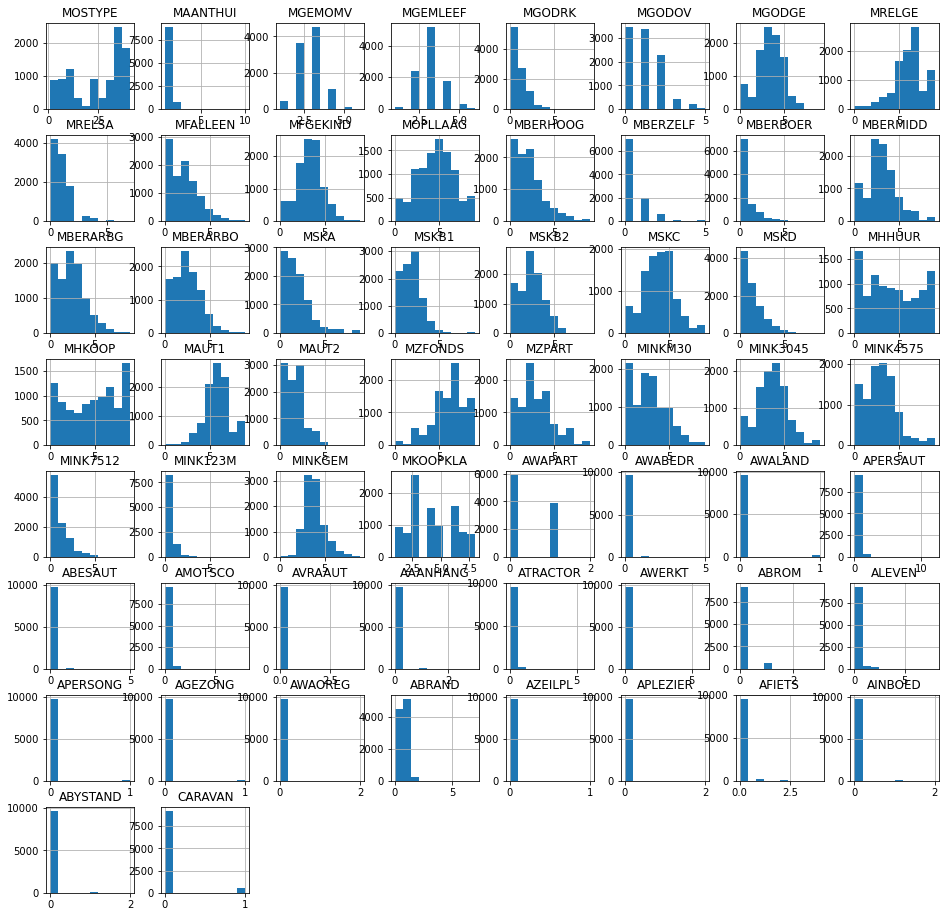

In [15]:
#Plotting histogram to know more about distribution of each feature
dataset1.hist(figsize=(16,16));


In [5]:
#Removing Features with Single class. Because they dont have much impact on result.
dataset2 = dataset1.drop(['ABESAUT', 'AGEZONG', 'AINBOED', 'APERSONG', 'APLEZIER', 'AVRAAUT', 'AWAOREG', 'AWERKT', 'AZEILPL'],axis=1)
dataset2.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODOV,MGODGE,MRELGE,MRELSA,...,APERSAUT,AMOTSCO,AAANHANG,ATRACTOR,ABROM,ALEVEN,ABRAND,AFIETS,ABYSTAND,CARAVAN
0,train,33,1,3,2,0,1,3,7,0,...,1,0,0,0,0,0,1,0,0,0
1,train,37,1,2,2,1,1,4,6,2,...,0,0,0,0,0,0,1,0,0,0
2,train,37,1,2,2,0,2,4,3,2,...,1,0,0,0,0,0,1,0,0,0
3,train,9,1,3,3,2,2,4,5,2,...,1,0,0,0,0,0,1,0,0,0
4,train,40,1,4,2,1,1,4,7,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
#This column states which rows should be used for training and testing. 
#But, We don't need this column as our ploblem is unsupervised.
dataset2.drop('ORIGIN',axis=1,inplace=True)

In [10]:
df = pd.get_dummies(data=dataset2, columns=['MOSTYPE'])
df.head()

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODOV,MGODGE,MRELGE,MRELSA,MFALLEEN,MFGEKIND,...,MOSTYPE_32,MOSTYPE_33,MOSTYPE_34,MOSTYPE_35,MOSTYPE_36,MOSTYPE_37,MOSTYPE_38,MOSTYPE_39,MOSTYPE_40,MOSTYPE_41
0,1,3,2,0,1,3,7,0,1,2,...,0,1,0,0,0,0,0,0,0,0
1,1,2,2,1,1,4,6,2,0,4,...,0,0,0,0,0,1,0,0,0,0
2,1,2,2,0,2,4,3,2,4,4,...,0,0,0,0,0,1,0,0,0,0
3,1,3,3,2,2,4,5,2,2,3,...,0,0,0,0,0,0,0,0,0,0
4,1,4,2,1,1,4,7,1,2,4,...,0,0,0,0,0,0,0,0,1,0


In [11]:
#Using Cosine Similarity to find similar kind of users.
user_similarity = pairwise_distances(df, metric='cosine')
user_similarity.shape

(9822, 9822)

In [12]:
#List of Policies, which we can recommend.
policiescolumnlist = ['AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'AMOTSCO','AAANHANG', 'ATRACTOR','ABROM', 'ALEVEN','ABRAND','AFIETS', 'ABYSTAND', 'CARAVAN']

In [13]:
#Taking example of user having index 0.
user_index=0

#extracting the list of policies which current user doesn't have
availablecollist=[]
for item in policiescolumnlist:
    if df.loc[user_index,item]==0:
        availablecollist.append(item)

Methodology :
Here,we are going to find top 10 similar users and will recommend product. accordingly.
We have fixed minimum number of policy 3. So if it doesn't get min 3 policy from top 10 similar users, Then it will go for next 10 similar users.
This code will check upto 200 similar user to get min no of products for recommendation.
But If it still does not able to find any product, then it will give msg "There are no products, as per top 200 similar people".

In [14]:
no_of_policies=3 #you can set this variable value as min number of policies you want to recommend.
output=dict()
i=1
while i < 20:
    opdf=df.iloc[user_similarity[user_index].argsort()[(i-1)*10:i*10], 35:48] #list of indexes of row
    tempoutput=dict(opdf[availablecollist].sum().sort_values()[opdf[availablecollist].sum().sort_values()>0])
    output.update(tempoutput)
    if len(output)>=no_of_policies:
        break
    i+=1
    if i>50:
        print("There are no products, as per top 200 similar people")
        break
output

{'AWAPART': 4, 'ATRACTOR': 2, 'ABROM': 2, 'CARAVAN': 2}

Result :
Above 4 are the recommended products for user with index 0. And number mentioned in front of them can be taken as weightage for each product.
For e.g :- There are more chances that user will purchase 'AWAPART' product than other products.